# Movies Recommender System

## Importing basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import warnings
warnings.simplefilter('ignore')

ModuleNotFoundError: No module named 'seaborn'

## Importing the dataset

In [2]:
df = pd.read_csv('datasets/movies_metadata.csv')
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


# Building Simple Recommender System
I will build our overall Top 250 Chart and will define a function to build charts for a particular genre.

I will use the TMDB Ratings to come up with our **Top Movies Chart.** We will use IMDB's *Weighted Rating* formula to construct my chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

We will use **95th percentile** as our cutoff to determine an appropriate value for *m*, the minimum votes required to be listed in the chart. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

In [3]:
# Extracting 'vote_count' and 'vote_average' from our dataset
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')

In [4]:
# Obtaining the mean vote across the whole report 'C'
C = vote_averages.mean()
C

5.244896612406511

It means the average rating for a movie on TMDB is 5.244 on a scale of 10.

In [5]:
# Obtaining the minimum votes required to be listed in the chart
m = vote_counts.quantile(0.95)
m

434.0

Therefore, a movie has to have at least 434 votes on TMDB to be qualified for the chart

In [6]:
# Evaluating an expression node or a string containing a Python literal or container display
df['genres'] = df['genres'].map(lambda x: literal_eval(x))
df['genres'] = df['genres'].fillna('[]').apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [7]:
df['year'] = pd.to_datetime(df['release_date'], errors = 'coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaT
45462,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011
45463,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917


In [8]:
# Obtaining the movies qualified to be in our chart
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified

,title,year,vote_count,vote_average,popularity,genres
0,Toy Story,1995,5415,7,21.946943,"[Animation, Comedy, Family]"
1,Jumanji,1995,2413,6,17.015539,"[Adventure, Fantasy, Family]"
5,Heat,1995,1886,7,17.924927,"[Action, Crime, Drama, Thriller]"
9,GoldenEye,1995,1194,6,14.686036,"[Adventure, Action, Thriller]"
15,Casino,1995,1343,7,10.137389,"[Drama, Crime]"
...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]"
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]"
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]"
44842,Transformers: The Last Knight,2017,1440,6,39.186819,"[Action, Science Fiction, Thriller, Adventure]"


In [9]:
qualified.shape

(2274, 6)

Therefore, 2274 movies qualify to be in our chart.

In [10]:
# This function calculates the IMDB's Weighted Rating 
def weighted_rating (x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [11]:
# Applying the above Weighted Rating on our qualified dataframe
qualified['wr'] = qualified.apply(weighted_rating, axis = 1)
qualified

,title,year,vote_count,vote_average,popularity,genres,wr
0,Toy Story,1995,5415,7,21.946943,"[Animation, Comedy, Family]",6.869770
1,Jumanji,1995,2413,6,17.015539,"[Adventure, Fantasy, Family]",5.884891
5,Heat,1995,1886,7,17.924927,"[Action, Crime, Drama, Thriller]",6.671675
9,GoldenEye,1995,1194,6,14.686036,"[Adventure, Action, Thriller]",5.798701
15,Casino,1995,1343,7,10.137389,"[Drama, Crime]",6.571348
...,...,...,...,...,...,...,...
44624,What Happened to Monday,2017,598,7,60.581223,"[Science Fiction, Thriller]",6.261904
44632,Atomic Blonde,2017,748,6,14.455104,"[Action, Thriller]",5.722745
44678,Dunkirk,2017,2712,7,30.938854,"[Action, Drama, History, Thriller, War]",6.757878
44842,Transformers: The Last Knight,2017,1440,6,39.186819,"[Action, Science Fiction, Thriller, Adventure]",5.825125


In [12]:
# Obtaining the Top 250 Chart
qualified = qualified.sort_values('wr', ascending = False).head(250)
qualified

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.917588
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.905871
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.897107
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.881753
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.871787
...,...,...,...,...,...,...,...
2006,Indiana Jones and the Temple of Doom,1984,2841,7,15.802306,"[Adventure, Action]",6.767415
16129,The King's Speech,2010,2817,7,11.260387,"[Drama, History]",6.765698
895,Sunset Boulevard,1950,533,8,11.709777,[Drama],6.763480
9888,Sin City,2005,2755,7,15.010525,"[Action, Thriller, Crime]",6.761143


Now, I am constructing a function that builds charts for particular genres. For this, I am gonna decrease the default condition to the **85th** percentile instead of 95. 

In [13]:
df1 = df.apply(lambda x: pd.Series(x['genres']), axis = 1).stack().reset_index(level = 1, drop = True)
df1.name = 'genre'
df1

0        Animation
0           Comedy
0           Family
1        Adventure
1          Fantasy
           ...    
45461       Family
45462        Drama
45463       Action
45463        Drama
45463     Thriller
Name: genre, Length: 91106, dtype: object

In [14]:
df_genre = df.drop('genres', axis = 1).join(df1)
df_genre

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Family
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Adventure
1,False,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Action
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Drama
45463,False,NaN,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,Thriller
45464,False,NaN,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,NaN


In [15]:
def build_chart(genre, percentile = 0.85):
    df = df_genre[df_genre['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

## Displaying the Top 15 Thriller movies in our dataset

In [16]:
build_chart('Thriller').head(15)

,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.956460
12481,The Dark Knight,2008,12269,8,123.167259,7.950165
292,Pulp Fiction,1994,8670,8,140.950236,7.929996
46,Se7en,1995,5915,8,18.45743,7.898573
24860,The Imitation Game,2014,5895,8,31.59594,7.898242
586,The Silence of the Lambs,1991,4549,8,4.307222,7.869538
11354,The Prestige,2006,4510,8,16.94556,7.868463
289,Leon: The Professional,1994,4293,8,20.477329,7.862142
4099,Memento,2000,4168,8,15.450789,7.858217
1213,The Shining,1980,3890,8,19.611589,7.848633


# Content Based Filtering (CBF) 

The recommender we built in the previous section has some severe limitations. Firstly, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who loves *triller* movies (and hates *action*) were to look at our Top 15 Chart, she/he would probably not like most of the movies. If she/he were to go one step further and look at our charts by genre, she/he would not be getting the best recommendations.

To personalise our recommendations more, I am going to build an engine that computes similarity between movies based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. This method of filtering is known as Content-Based Filtering since it uses the similarities in products, services, or content features, as well as information accumulated about the user to make recommendations.

I will build two Content-Based Filtering Recommenders based on:
* Movie Overviews and Taglines
* Movie Cast, Crew, Keywords and Genre

In [17]:
# Importing the required dataset
links = pd.read_csv('datasets/links_small.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [18]:
# Extracting TMDB Ids only
links = links[links['tmdbId'].notnull()]['tmdbId'].astype('int')
links

0          862
1         8844
2        15602
3        31357
4        11862
         ...  
9120    402672
9121    315011
9122    391698
9123    137608
9124    410803
Name: tmdbId, Length: 9112, dtype: int32

We need to perform mapping of our original movies metadata dataframe with the credits dataframe on the TMDB Movie ID. Before we are able to perform this mapping, we need to make sure that the ID column of our main dataframe is clean and of type integer. To do this, let us try to perform an integer conversion of our IDs and if an exception is raised, we will replace the ID with NaN. We will then proceed to drop these rows from our dataframe.

In [19]:
# This function performs an integer conversion of our IDs
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [20]:
# Applying the conversion
df['id'] = df['id'].apply(convert_int)

In [21]:
# Extracting the movies list with NaN value
df[df['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [22]:
# Dropping the rows with NaN value in ID
df = df.drop([19730, 29503, 35587])

In [23]:
df['id'] = df['id'].astype('int')

In [24]:
df_links = df[df['id'].isin(links)]
df_links

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40224,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,...,77000000.0,120.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016
40503,False,NaN,0,"[Documentary, Music]",http://www.thebeatlesliveproject.com/,391698,tt2531318,en,The Beatles: Eight Days a Week - The Touring Y...,"The band stormed Europe in 1963, and, in 1964,...",...,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The band you know. The story you don't.,The Beatles: Eight Days a Week - The Touring Y...,False,7.6,92.0,2016
44821,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,"[Adventure, Fantasy, Animation, Action, Family]",http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,...,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,144.0,2000
44826,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",0,"[Adventure, Fantasy, Animation, Science Fictio...",http://www.pokemon.com/us/movies/movie-pokemon...,12600,tt0287635,ja,劇場版ポケットモンスター セレビィ 時を越えた遭遇（であい）,"All your favorite Pokémon characters are back,...",...,28023563.0,75.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Pokémon 4Ever: Celebi - Voice of the Forest,False,5.7,82.0,2001


In [25]:
# Keeping the movies title at lowercase
df_links['title'] = df_links['title'].str.lower()

## Movie Description Based Recommender System

I am gonna first try to build a recommender using movie descriptions and taglines. For this, I will be comparing the sklearn's two **Pairwise Metrics**: *Euclidean Distance* and *Cosine Similarity* to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, they are defined as follows:

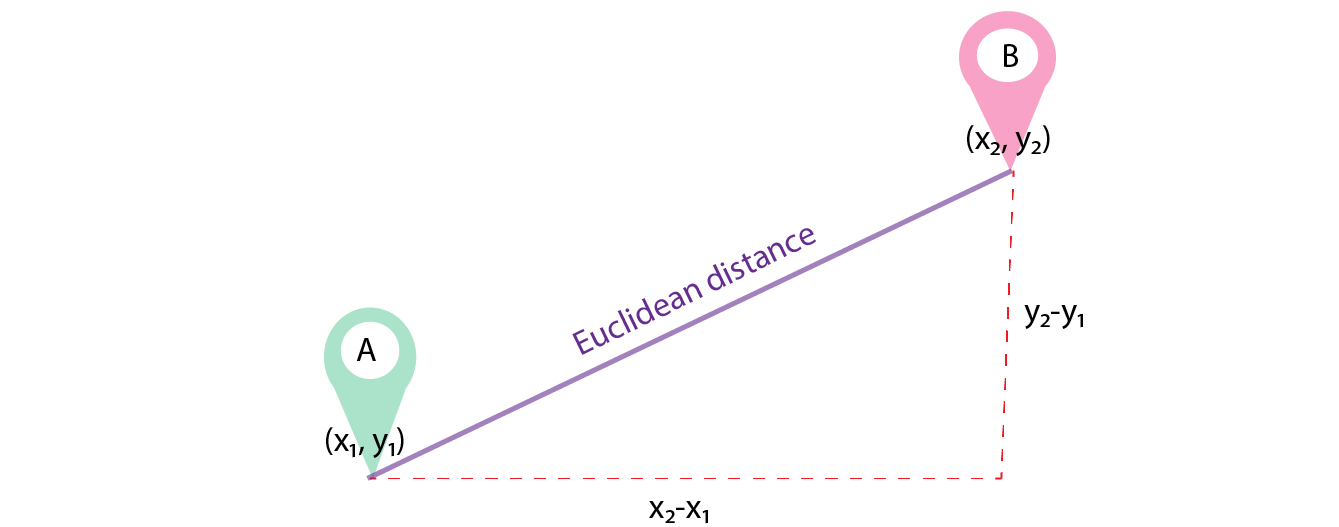

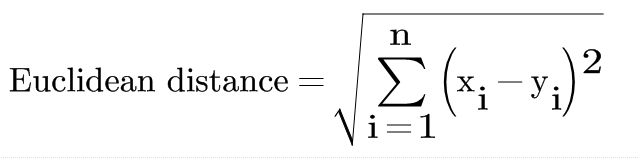

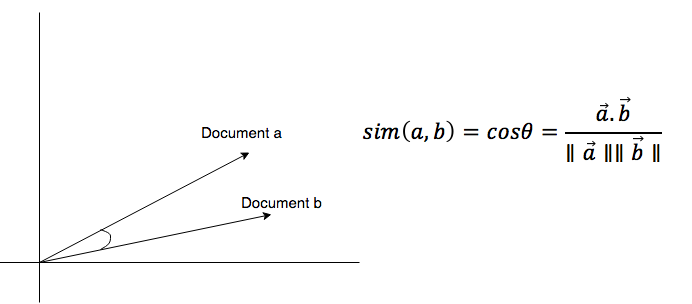

In [26]:
# Extracting descriptions and taglines from the dataset
df_links['tagline'] = df_links['tagline'].fillna('')
df_links['description'] = df_links['overview'] + df_links['tagline']
df_links['description'] = df_links['description'].fillna('')

### Importing the necessary sklearn libraries

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, linear_kernel

### Using Bag of Words as a feature extraction

In [28]:
# Creating a count matrix
cv = CountVectorizer(ngram_range = (1, 2), min_df = 0, stop_words = 'english')
count_matrix = cv.fit_transform(df_links['description'])

In [29]:
count_matrix.shape

(9099, 268124)

In [30]:
# Creating a Euclidean distance matrix based on Bag of Words as a feature extraction
bow_euclidean = euclidean_distances(count_matrix, count_matrix)
bow_euclidean[0]

array([ 0.        , 12.80624847, 12.32882801, ..., 13.03840481,
       17.2626765 ,  9.89949494])

In [31]:
# Creating a Similarity score matrix based on Bag of Words as a feature extraction
bow_similarity = cosine_similarity(count_matrix, count_matrix)
bow_similarity[0]

array([1.        , 0.01206221, 0.        , ..., 0.        , 0.00756816,
       0.        ])

### Creating a function that returns the *k* most similar movies based on Bag of Words as a feature extraction

In [32]:
df_links = df_links.reset_index()
titles = df_links['title']
indices = pd.Series(df_links.index, index = df_links['title'])

In [33]:
def bow_recommendations(title, k):
    """
    Calculates top k movies to recommend based on given movie titles description. 
    :param title: Title of the movie to be taken for base of recommendation
    :param k: Number of recommended movies 
    :return: Titles of movies recommended to user
    """
    title = title.lower()
    x = input("Choose the pairwise similarity metric '(Euclidean/Cosine)': ")
    
    # Choosing the pairwise similarity metric
    if x == 'Euclidean':
        similarity = bow_euclidean
    elif x == 'Cosine':
        similarity = bow_similarity
    
    # Getting the recommendations
    if title not in titles.unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        # Get the index of the movie that matches the title
        idx_movie = indices[title]
        
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores_movies = list(enumerate(similarity[idx_movie]))
        
        # Sort the movies based on the similarity scores
        sim_scores_movies = sorted(sim_scores_movies, key = lambda x: x[1], reverse = True)
        
        # Get the scores of the k most similar movies
        sim_scores_movies = sim_scores_movies[1:k+1] # Excluding first item since it is the requested movie itself
        
        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores_movies]
    
        # Return the top k most similar movies
        return titles.iloc[movie_indices]

Let us now try and get the top recommendations for a few movies and see how good the recommendations are.

In [34]:
bow_recommendations('The Godfather', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Euclidean


3552                            imagine: john lennon
6643                                        the host
7764                  american: the bill hicks story
5969    outfoxed: rupert murdoch's war on journalism
8503                                   gerontophilia
8864                       cocaine cowboys: reloaded
7425                           dante's hell animated
6488                                cabin in the sky
177                                     three wishes
775                             angel on my shoulder
Name: title, dtype: object

In [35]:
bow_recommendations('The Godfather', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Cosine


973     the godfather: part ii
8387                the family
9076           the maid's room
4196        johnny dangerously
9017    manson family vacation
5728               spider baby
3509                      made
4788            mambo italiano
8129                  sinister
4624           mr & mrs bridge
Name: title, dtype: object

In [36]:
bow_recommendations('the dark knight', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Euclidean


3552                            imagine: john lennon
6643                                        the host
7764                  american: the bill hicks story
5969    outfoxed: rupert murdoch's war on journalism
8503                                   gerontophilia
7425                           dante's hell animated
8864                       cocaine cowboys: reloaded
177                                     three wishes
6488                                cabin in the sky
1261                                         air bud
Name: title, dtype: object

In [37]:
bow_recommendations('the dark knight', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Cosine


7931                      the dark knight rises
132                              batman forever
1113                             batman returns
7565                 batman: under the red hood
524                                      batman
7901                           batman: year one
8227    batman: the dark knight returns, part 2
8165    batman: the dark knight returns, part 1
4489                                      q & a
2579               batman: mask of the phantasm
Name: title, dtype: object

From the results obtained, we can conclude that Cosine similarity metric is better in accuracy since the movies recommended by Cosine similarity are more closer and similar than that by Euclidean distance.

### Using TF-IDF as a feature extraction

In [38]:
# Creating a tfidf matrix
tv = TfidfVectorizer(ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tv.fit_transform(df_links['description'])

In [39]:
tfidf_matrix.shape

(9099, 268124)

In [40]:
# Creating a Euclidean distance matrix based on TF-IDF as a feature extraction
tfidf_euclidean = euclidean_distances(tfidf_matrix, tfidf_matrix)
tfidf_euclidean[0]

array([0.        , 1.40939366, 1.41421356, ..., 1.41421356, 1.41177256,
       1.41421356])

Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [41]:
# Creating a Similarity score matrix based on TF-IDF as a feature extraction
tfidf_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
tfidf_similarity[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

### Creating a function that returns the *k* most similar movies based on TF-IDF as a feature extraction

In [42]:
def tfidf_recommendations(title, k):
    """
    Calculates top k movies to recommend based on given movie titles description. 
    :param title: Title of the movie to be taken for base of recommendation
    :param k: Number of recommended movies 
    :return: Titles of movies recommended to user
    """
    title = title.lower()
    x = input('Choose the pairwise similarity metric `(Euclidean/Cosine)`: ')
    
    # Choosing the pairwise similarity metric
    if x == 'Euclidean':
        similarity = tfidf_euclidean
    elif x == 'Cosine':
        similarity = tfidf_similarity
    
    # Getting the recommendations
    if title not in titles.unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        # Get the index of the movie that matches the title
        idx_movie = indices[title]
        
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores_movies = list(enumerate(similarity[idx_movie]))
        
        # Sort the movies based on the similarity scores
        sim_scores_movies = sorted(sim_scores_movies, key = lambda x: x[1], reverse = True)
        
        # Get the scores of the k most similar movies
        sim_scores_movies = sim_scores_movies[1:k+1] # Excluding first item since it is the requested movie itself
        
        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores_movies]
    
        # Return the top k most similar movies
        return titles.iloc[movie_indices]

In [43]:
tfidf_recommendations('The Godfather', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Euclidean


121                                   up close & personal
351                                       colonel chabert
416     the englishman who went up a hill but came dow...
556                                            sgt. bilko
743                                         all about eve
760                               the ghost and mrs. muir
910                                            snowriders
941                                          passion fish
1166                                        mchale's navy
1184                                           booty call
Name: title, dtype: object

In [44]:
tfidf_recommendations('The Godfather', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Cosine


973      the godfather: part ii
8387                 the family
3509                       made
4196         johnny dangerously
29               shanghai triad
5667                       fury
2412             american movie
1582    the godfather: part iii
4221                    8 women
2159              summer of sam
Name: title, dtype: object

In [45]:
tfidf_recommendations('the dark knight', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Euclidean


1224                        the promise
121                 up close & personal
743                       all about eve
1556                       the exorcist
1793                 permanent midnight
1892                         home fries
1949                   playing by heart
1987    blood, guts, bullets and octane
2290                           splendor
2649                       a dog's life
Name: title, dtype: object

In [46]:
tfidf_recommendations('the dark knight', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Cosine


7931                      the dark knight rises
132                              batman forever
1113                             batman returns
8227    batman: the dark knight returns, part 2
7565                 batman: under the red hood
524                                      batman
7901                           batman: year one
2579               batman: mask of the phantasm
2696                                        jfk
8165    batman: the dark knight returns, part 1
Name: title, dtype: object

## Metadata Based Recommender System
We see that for **The Dark Knight**, our system is able to identify it as a Batman film and subsequently recommend other Batman films as its top recommendations. But unfortunately, that is all this system can do at the moment. This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie. Someone who liked **The Dark Knight** probably likes it more because of *Christopher Nolan* and would hate **Batman Forever** and every other substandard and animated movies in the Batman Franchise.

Therefore, I am gonna use much more suggestive metadata than **Overview** and **Tagline**. In the next subsection, we will build a more sophisticated recommender that takes **genre**, **keywords**, **cast** and **crew** into consideration.

In [47]:
# Importing the cedits and keywords datasets
credits = pd.read_csv('datasets/credits.csv')

In [48]:
credits['id'] = credits['id'].astype('int')

In [49]:
df_meta = df.merge(credits, on = 'id')

In [50]:
df_meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45533,False,NaN,0,"[Drama, Family]",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaT,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,False,NaN,0,[Drama],NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,False,NaN,0,"[Action, Drama, Thriller]",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."


In [51]:
df_meta_links = df_meta[df_meta['id'].isin(links)]
df_meta_links

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39862,False,NaN,8000000,[Drama],NaN,159550,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,...,[],Released,NaN,The Last Brickmaker in America,False,7.0,1.0,2001,"[{'cast_id': 1, 'character': 'Henry Cobb', 'cr...","[{'credit_id': '544475aac3a36819fb000578', 'de..."
40082,False,NaN,1000000,"[Thriller, Romance]",NaN,392572,tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",...,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Decorated Officer. Devoted Family Man. Defendi...,Rustom,False,7.3,25.0,2016,"[{'cast_id': 0, 'character': 'Rustom Pavri', '...","[{'credit_id': '5951baf692514129c4016600', 'de..."
40135,False,NaN,15050000,"[Adventure, Drama, History, Romance]",NaN,402672,tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",...,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mohenjo Daro,False,6.7,26.0,2016,"[{'cast_id': 0, 'character': 'Sarman', 'credit...","[{'credit_id': '57cd5d3592514179d50018e8', 'de..."
40301,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,...,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,A god incarnate. A city doomed.,Shin Godzilla,False,6.6,152.0,2016,"[{'cast_id': 4, 'character': 'Rando Yaguchi : ...","[{'credit_id': '560892fa92514177550018b2', 'de..."


We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

1. **Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the *feel* of the movie.
2. **Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list. 

In [52]:
# Evaluating an expression node or a string containing a Python literal or container display
df_meta_links['cast'] = df_meta_links['cast'].apply(literal_eval)
df_meta_links['crew'] = df_meta_links['crew'].apply(literal_eval)

In [53]:
df_meta_links['cast_size'] = df_meta_links['cast'].apply(lambda x: len(x))
df_meta_links['crew_size'] = df_meta_links['crew'].apply(lambda x: len(x))

In [54]:
def get_directors(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [55]:
df_meta_links['director'] = df_meta_links['crew'].apply(get_directors)
df_meta_links['director']

0             John Lasseter
1              Joe Johnston
2             Howard Deutch
3           Forest Whitaker
4             Charles Shyer
                ...        
39862        Gregg Champion
40082     Tinu Suresh Desai
40135    Ashutosh Gowariker
40301          Hideaki Anno
40579            Ron Howard
Name: director, Length: 9133, dtype: object

In [56]:
df_meta_links['cast'] = df_meta_links['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df_meta_links['cast'] = df_meta_links['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [57]:
df_meta_links['director'] = df_meta_links['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
df_meta_links['director'] = df_meta_links['director'].apply(lambda x: [x])
df_meta_links['director']

0             [johnlasseter]
1              [joejohnston]
2             [howarddeutch]
3           [forestwhitaker]
4             [charlesshyer]
                ...         
39862        [greggchampion]
40082      [tinusureshdesai]
40135    [ashutoshgowariker]
40301          [hideakianno]
40579            [ronhoward]
Name: director, Length: 9133, dtype: object

In [58]:
df_meta_links['cast'] = df_meta_links['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
df_meta_links['cast']

0                         [tomhanks, timallen, donrickles]
1              [robinwilliams, jonathanhyde, kirstendunst]
2                 [waltermatthau, jacklemmon, ann-margret]
3           [whitneyhouston, angelabassett, lorettadevine]
4                  [stevemartin, dianekeaton, martinshort]
                               ...                        
39862          [sidneypoitier, wendycrewson, jayo.sanders]
40082               [akshaykumar, ileanad'cruz, eshagupta]
40135               [hrithikroshan, poojahegde, kabirbedi]
40301    [hirokihasegawa, yutakatakenouchi, satomiishih...
40579              [paulmccartney, ringostarr, johnlennon]
Name: cast, Length: 9133, dtype: object

In [59]:
df_meta_links['combo'] = df_meta_links['cast'] + df_meta_links['director'] + df_meta_links['genres']
df_meta_links['combo'] = df_meta_links['combo'].apply(lambda x: ' '.join(x))

In [60]:
df_meta_links['combo']

0        tomhanks timallen donrickles johnlasseter Anim...
1        robinwilliams jonathanhyde kirstendunst joejoh...
2        waltermatthau jacklemmon ann-margret howarddeu...
3        whitneyhouston angelabassett lorettadevine for...
4        stevemartin dianekeaton martinshort charlesshy...
                               ...                        
39862    sidneypoitier wendycrewson jayo.sanders greggc...
40082    akshaykumar ileanad'cruz eshagupta tinusureshd...
40135    hrithikroshan poojahegde kabirbedi ashutoshgow...
40301    hirokihasegawa yutakatakenouchi satomiishihara...
40579    paulmccartney ringostarr johnlennon ronhoward ...
Name: combo, Length: 9133, dtype: object

In [61]:
# Keeping the movies title at lowercase
df_meta_links['title'] = df_meta_links['title'].str.lower()

### Using Bag of Words as a feature extraction

In [62]:
# Creating a count matrix
cv = CountVectorizer(ngram_range = (1, 2), min_df = 0, stop_words = 'english')
count_matrix = cv.fit_transform(df_meta_links['combo'])

In [63]:
count_matrix.shape

(9133, 46742)

In [64]:
# Creating a Euclidean distance matrix based on Bag of Words as a feature extraction
bow_euclidean = euclidean_distances(count_matrix, count_matrix)
bow_euclidean[0]

array([0.        , 4.89897949, 4.89897949, ..., 5.29150262, 5.65685425,
       4.89897949])

In [65]:
# Creating a Similarity score matrix based on Bag of Words as a feature extraction
bow_similarity = cosine_similarity(count_matrix, count_matrix)
bow_similarity[0]

array([1.        , 0.07692308, 0.07692308, ..., 0.        , 0.        ,
       0.        ])

In [66]:
df_meta_links = df_meta_links.reset_index()
titles = df_meta_links['title']
indices = pd.Series(df_meta_links.index, index = df_meta_links['title'])

In [67]:
bow_recommendations('The Godfather', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Euclidean


939                          delicatessen
1268                                spawn
3515    final fantasy: the spirits within
3979          vampire hunter d: bloodlust
4248           jonah: a veggietales movie
5663                       blade: trinity
6280        left behind iii: world at war
7195         the good, the bad, the weird
8332           legendary weapons of china
599                             the quest
Name: title, dtype: object

In [68]:
bow_recommendations('The Godfather', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Cosine


982            the godfather: part ii
1334                    the rainmaker
969                    apocalypse now
3288                 gardens of stone
4124                      the gambler
1590          the godfather: part iii
3664                      sea of love
3685                  the cotton club
3596    tucker: the man and his dream
15                             casino
Name: title, dtype: object

In [69]:
bow_recommendations('the dark knight', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Euclidean


3877                     jimmy neutron: boy genius
1110                           the preacher's wife
3979                   vampire hunter d: bloodlust
4200                          the care bears movie
4248                    jonah: a veggietales movie
4376                               treasure planet
5334    spring, summer, fall, winter... and spring
5911                              the 10th kingdom
5914                                          2046
5931                                 my sassy girl
Name: title, dtype: object

In [70]:
bow_recommendations('the dark knight', 10)

Choose the pairwise similarity metric '(Euclidean/Cosine)':  Cosine


7971      the dark knight rises
6174              batman begins
6575               the prestige
5903                   thursday
8859    kidnapping mr. heineken
3844               the gauntlet
149                     hackers
7505                harry brown
440           menace ii society
624               force of evil
Name: title, dtype: object

### Using TF-IDF as a feature extraction

In [71]:
# Creating a tfidf matrix
tv = TfidfVectorizer(ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tv.fit_transform(df_meta_links['combo'])

In [72]:
tfidf_matrix.shape

(9133, 46742)

In [73]:
# Creating a Euclidean distance matrix based on TF-IDF as a feature extraction
tfidf_euclidean = euclidean_distances(tfidf_matrix, tfidf_matrix)
tfidf_euclidean[0]

array([0.        , 1.40219779, 1.41011783, ..., 1.41421356, 1.41421356,
       1.41421356])

In [74]:
# Creating a Similarity score matrix based on TF-IDF as a feature extraction
tfidf_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
tfidf_similarity[0]

array([1.        , 0.01692068, 0.00578385, ..., 0.        , 0.        ,
       0.        ])

In [75]:
tfidf_recommendations('The Godfather', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Euclidean


28                            the city of lost children
31                                       twelve monkeys
36                                         it takes two
59    don't be a menace to south central while drink...
60                                        two if by sea
62                   lawnmower man 2: beyond cyberspace
66                                            fair game
71                                            nico icon
78                          last summer in the hamptons
81                                    dunston checks in
Name: title, dtype: object

In [76]:
tfidf_recommendations('The Godfather', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Cosine


982            the godfather: part ii
3288                 gardens of stone
969                    apocalypse now
1334                    the rainmaker
3596    tucker: the man and his dream
4486               one from the heart
1590          the godfather: part iii
4124                      the gambler
3685                  the cotton club
3929                   one-eyed jacks
Name: title, dtype: object

In [77]:
tfidf_recommendations('the dark knight', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Euclidean


28                            the city of lost children
36                                         it takes two
59    don't be a menace to south central while drink...
60                                        two if by sea
71                                            nico icon
78                          last summer in the hamptons
81                                    dunston checks in
85                                  vampire in brooklyn
91                        heidi fleiss: hollywood madam
96                                        happy gilmore
Name: title, dtype: object

In [78]:
tfidf_recommendations('the dark knight', 10)

Choose the pairwise similarity metric `(Euclidean/Cosine)`:  Cosine


6575               the prestige
7971      the dark knight rises
6174              batman begins
3844               the gauntlet
8859    kidnapping mr. heineken
5903                   thursday
3000                      shaft
7505                harry brown
8737     exodus: gods and kings
3159                 get carter
Name: title, dtype: object

### Adding Popularity and Ratings to our features

One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity. I will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

I will take the top $k$ movies based on similarity scores and calculate the vote of the 60th percentile movie. Then, using this as the value of $m$, we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [79]:
def improved_recommendations(title, k, percentile = 0.60):
    
    title = title.lower()
    x = input('Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`: ')
    
    # Choosing the pairwise similarity metric
    if x == 'bow_euclidean':
        similarity = bow_euclidean
    elif x == 'bow_cosine':
        similarity = bow_similarity
    elif x == 'tfidf_euclidean':
        similarity = tfidf_euclidean
    elif x == 'tfidf_cosine':
        similarity = tfidf_similarity
    
    # Getting the recommendations
    if title not in titles.unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        # Get the index of the movie that matches the title
        idx_movie = indices[title]
        
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores_movies = list(enumerate(similarity[idx_movie]))
        
        # Sort the movies based on the similarity scores
        sim_scores_movies = sorted(sim_scores_movies, key = lambda x: x[1], reverse = True)
        
        # Get the scores of the k most similar movies
        sim_scores_movies = sim_scores_movies[1:k+1] # Excluding first item since it is the requested movie itself
        
        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores_movies]
    
    movies = df_meta_links.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis = 1)
    qualified = qualified.sort_values('wr', ascending = False)
    
    return qualified

In [80]:
improved_recommendations('The Dark Knight', 20)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  bow_euclidean


,title,vote_count,vote_average,year,wr
521,aladdin,3495,7,1992,6.806130
527,beauty and the beast,3029,7,1991,6.780042
4376,treasure planet,980,7,2002,6.461305
8717,the book of life,778,7,2014,6.371522
5334,"spring, summer, fall, winter... and spring",240,7,2003,5.869859
6676,the host,546,6,2006,5.665597
3877,jimmy neutron: boy genius,235,5,2001,5.158872
8436,don jon,1708,5,2013,5.049620


In [81]:
improved_recommendations('The Dark Knight', 20)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  tfidf_euclidean


,title,vote_count,vote_average,year,wr
196,clerks,769,7,1994,6.366821
28,the city of lost children,308,7,1995,5.973430
96,happy gilmore,767,6,1996,5.727132
59,don't be a menace to south central while drink...,192,6,1996,5.476494
208,french kiss,179,6,1995,5.465392
130,rob roy,151,6,1995,5.439804
36,it takes two,149,6,1995,5.437882
152,judge dredd,643,5,1995,5.098686


In [82]:
improved_recommendations('Pulp Fiction', 30)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  bow_euclidean


,title,vote_count,vote_average,year,wr
4376,treasure planet,980,7,2002,6.461305
1148,the last of the mohicans,747,7,1992,6.355026
939,delicatessen,320,7,1991,5.989768
5334,"spring, summer, fall, winter... and spring",240,7,2003,5.869859
5321,a tale of two sisters,234,7,2003,5.859708
7195,"the good, the bad, the weird",196,7,2008,5.790929
6676,the host,546,6,2006,5.665597
2029,westworld,345,6,1973,5.579313
5914,2046,208,6,2004,5.489541
1268,spawn,344,5,1997,5.136613


In [83]:
improved_recommendations('Pulp Fiction', 30)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  tfidf_euclidean


,title,vote_count,vote_average,year,wr
328,the lion king,5520,8,1994,7.799175
100,braveheart,3404,7,1995,6.801533
28,the city of lost children,308,7,1995,5.973430
32,babe,756,6,1995,5.724609
171,smoke,115,7,1995,5.612541
245,mary shelley's frankenstein,272,6,1994,5.535815
239,major payne,164,6,1995,5.451982
130,rob roy,151,6,1995,5.439804
537,heavy metal,150,6,1981,5.438844
98,muppet treasure island,93,6,1996,5.378150


In [84]:
improved_recommendations('The Dark Knight', 20)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  bow_cosine


,title,vote_count,vote_average,year,wr
6575,the prestige,4510,8,2006,7.758148
7971,the dark knight rises,9263,7,2012,6.921448
6174,batman begins,7511,7,2005,6.904127
1520,the french connection,435,7,1971,6.123458
2974,gone in sixty seconds,1511,6,2000,5.831509
149,hackers,406,6,1995,5.609863
7505,harry brown,351,6,2009,5.582529
2760,romeo must die,334,6,2000,5.573288


In [85]:
improved_recommendations('The Dark Knight', 20)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  tfidf_cosine


,title,vote_count,vote_average,year,wr
6575,the prestige,4510,8,2006,7.758148
7971,the dark knight rises,9263,7,2012,6.921448
6174,batman begins,7511,7,2005,6.904127
6574,children of men,2120,7,2006,6.701756
2974,gone in sixty seconds,1511,6,2000,5.831509
4121,insomnia,1181,6,2002,5.797081
3447,swordfish,946,6,2001,5.762525
8737,exodus: gods and kings,1957,5,2014,5.044452


In [86]:
improved_recommendations('Pulp Fiction', 30)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  bow_cosine


,title,vote_count,vote_average,year,wr
8778,kingsman: the secret service,6069,7,2015,6.882867
8837,the hateful eight,4405,7,2015,6.842588
5168,kill bill: vol. 2,4061,7,2004,6.830542
1369,jackie brown,1580,7,1997,6.621790
144,die hard: with a vengeance,2094,6,1995,5.870366
3202,unbreakable,1994,6,2000,5.865027
65,from dusk till dawn,1644,6,1996,5.842293
6746,1408,1372,6,2007,5.818541
1624,the negotiator,593,6,1998,5.680901
8494,oldboy,632,5,2013,5.099705


In [87]:
improved_recommendations('Pulp Fiction', 30)

Choose the pairwise similarity metric `(bow_euclidean/bow_cosine/tfidf_euclidean/tfidf_cosine)`:  tfidf_cosine


,title,vote_count,vote_average,year,wr
8837,the hateful eight,4405,7,2015,6.842588
5168,kill bill: vol. 2,4061,7,2004,6.830542
1369,jackie brown,1580,7,1997,6.621790
661,a time to kill,522,7,1996,6.203227
144,die hard: with a vengeance,2094,6,1995,5.870366
3202,unbreakable,1994,6,2000,5.865027
6746,1408,1372,6,2007,5.818541
1624,the negotiator,593,6,1998,5.680901
1396,sphere,483,5,1998,5.115905
4732,s.w.a.t.,780,5,2003,5.087550


# Collaborative Filtering
Types of collaborative filtering techniques are
* Memory based 
 - User-Item Filtering
 - Item-Item Filtering
* Model based 
 - Matrix Factorization
 - Clustering
 - Deep Learning
 ![alt text](https://cdn-images-1.medium.com/max/1500/1*7uW5hLXztSu_FOmZOWpB6g.png)

## Memory Based Approach
 ![alt text](https://cdn-images-1.medium.com/max/1500/1*QvhetbRjCr1vryTch_2HZQ.jpeg)

In either scenario, we builds a similarity matrix. For user-user collaborative filtering, the user-similarity matrix will consist of some distance metrics that measure the similarity between any two pairs of users. Likewise, the item-similarity matrix will measure the similarity between any two pairs of items.

There are 3 distance similarity metrics that are usually used in collaborative filtering:

- **Jaccard Similarity**
- **Cosine Similarity** 
- **Pearson Similarity** 

## Item-Item Filtering
Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.


Item-item collaborative filtering was invented and used by Amazon.com
![alt text](https://cdn-images-1.medium.com/max/1600/1*skK2fqWiBF7weHU8SjuCzw.png)

ITEM-ITEM collaborative filtering look for items that are similar to the articles that user has already rated and recommend most similar articles. But what does that mean when we say item-item similarity? In this case we don’t mean whether two items are the same by attribute like Fountain pen and pilot pen are similar because both are pen. Instead, what similarity means is how people treat two items the same in terms of like and dislike.

It is quite similar to previous algorithm, but instead of finding user’s look-alike, we try finding movie’s look-alike. Once we have movie’s look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset. This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users. And with fixed number of movies, movie-movie look alike matrix is fixed over time.

## Implementation of Item-Item Collaborative Filtering

In [88]:
# Importing the movies and ratings dataset
df_movies = pd.read_csv('datasets/movies.csv')
df_ratings = pd.read_csv('datasets/ratings.csv')

In [89]:
# Merging movies and ratings datasets
df_movies_ratings = pd.merge(df_movies, df_ratings)
df_movies_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


#### Here, we need to perform one-to-one mapping between movies, user and their ratingHere. Therefore, we use *Pivot Table Function*. 

In [90]:
ratings_matrix_items = df_movies_ratings.pivot_table(index = ['movieId'], columns = ['userId'],values = 'rating').reset_index(drop = True)
ratings_matrix_items.fillna(0, inplace = True )
ratings_matrix_items.shape

(9724, 610)

In [91]:
ratings_matrix_items

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
movie_similarity = cosine_similarity(ratings_matrix_items.to_numpy())
np.fill_diagonal(movie_similarity, 0 ) # Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame(movie_similarity)
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
9721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


Now, I will create a function that takes the movie name as an input and returns the movies which are similar to this movie.
This function first find the index of movie in movies frame and then take the similarity of movie and align in movies dataframe so that we can get the similarity of the movie with all other movies.

In [93]:
def item_similarity(movieName): 
    """
    recommends similar movies
   :param data: name of the movie 
   """
    try:
        user_input = movieName
        inp = df_movies[df_movies['title'] == user_input].index.tolist()
        inp = inp[0]

        df_movies['similarity'] = ratings_matrix_items.iloc[inp]
        df_movies.columns = ['movie_id', 'title', 'release_date', 'similarity']
    except:
        print('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')

Now, I will create another function taking user id as an input for which we have to recommend movies.

Then, I extract the movies which are rated 5 or 4.5 by the user for whom we want to recommend movies. This needs to be done because as we know that in Item-Item similarity approach movies are recommended to the user based on his previous selection.

So to foster the algorithm most liked movies are found and on bases of that, movies are recommended which are similar to movies highly rated by the user.

Then the function appends the similarity of the movie highly rated by the user to the *movies* dataframe.
After that the dataframe is sorted as per the similarity in descending order so that the movies which are highly similar to movie highly rated by the customer.

The function then filters the movies which are most similar as per the similarity. If similarity is greater than 0.45 then we are the movies are considered.

Finally, the function goes ahead and see which all movies user has seen and then filter out the movies which he has not seen and then recommends movies to the user.

In [94]:
def recommendedMoviesAsperItemSimilarity(user_id):
    """
     Recommending movie which user hasn't watched as per Item Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user_movie = df_movies_ratings[(df_movies_ratings.userId==user_id) & df_movies_ratings.rating.isin([5, 4.5])][['title']]
    user_movie = user_movie.iloc[0,0]
    
    item_similarity(user_movie)
    
    sorted_movies_as_per_userChoice = df_movies.sort_values(["similarity"], ascending = False )
    sorted_movies_as_per_userChoice = sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >= 0.45]['movie_id']
    
    recommended_movies = list()
    df_recommended_item = pd.DataFrame()
    user2Movies = df_ratings[df_ratings['userId'] == user_id]['movieId']
    
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                df_new = df_ratings[(df_ratings.movieId == movieId)]
                df_recommended_item = pd.concat([df_recommended_item, df_new])
            best10 = df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    return best10['movieId']

In [95]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles = list()
    for id in listMovieIDs:
        movie_titles.append(df_movies[df_movies['movie_id'] == id]['title'])
    return movie_titles

In [96]:
user_id = 60
print("Recommended movies:\n", movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id)))

Recommended movies:
 [510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 659    Godfather, The (1972)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 659    Godfather, The (1972)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, 224    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object]


## User-Item Filtering
The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.
![alt text](https://cdn-images-1.medium.com/max/1500/0*o0zVW2O6Rv-LI5Mu.png)

Here we find look alike users based on similarity and recommend movies which first user’s look-alike has chosen in past. This algorithm is very effective but takes a lot of time and resources. It requires to compute every user pair information which takes time. Therefore, for big base platforms, this algorithm is hard to implement without a very strong parallelizable system.

## Implementation of User-Item Filtering
In similar way as we did for ItemItem similarity we will create a matrix but here we will keep rows as user and columns as movieId as we want a vector of different users.
Then in similar ways we will find distance and similarity between users.

In [97]:
ratings_matrix_users = df_movies_ratings.pivot_table(index = ['userId'], columns = ['movieId'], values = 'rating').reset_index(drop = True)
ratings_matrix_users.fillna(0, inplace = True )
movie_similarity = cosine_similarity(ratings_matrix_users.to_numpy())
np.fill_diagonal(movie_similarity, 0 ) # Filling diagonals with 0s for future use when sorting is done
ratings_matrix_users = pd.DataFrame(movie_similarity)
ratings_matrix_users

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,0.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,0.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,0.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,0.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,0.000000,0.153063,0.262558,0.069622,0.201104
606,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,0.000000,0.283081,0.149190,0.139114
607,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,0.000000,0.121993,0.322055
608,0.093572,0.027565,0.000000,0.032198,0.261232,0.214234,0.090840,0.423993,0.000000,0.021766,...,0.035653,0.335231,0.061941,0.236601,0.097610,0.069622,0.149190,0.121993,0.000000,0.053225


Here now we have similarity of users in colums with respective users in row. So if we find maximum value in a column we will get the user with highest similarity. So now we can have a pair of users which are similar.

In [98]:
ratings_matrix_users.idxmax(axis = 1)

0      265
1      365
2      312
3      390
4      469
      ... 
605    473
606    569
607    479
608    339
609    248
Length: 610, dtype: int64

In [99]:
ratings_matrix_users.idxmax(axis = 1).sample(10, random_state = 10 )

547     76
241    467
277    337
348    454
218    238
407    278
352     45
97     600
381     20
607    479
dtype: int64

In [100]:
similar_user_series = ratings_matrix_users.idxmax(axis = 1)
df_similar_user = similar_user_series.to_frame()

In [101]:
df_similar_user.columns = ['similarUser']

In [102]:
df_similar_user

,similarUser
0,265
1,365
2,312
3,390
4,469
...,...
605,473
606,569
607,479
608,339


Below function takes id of the user to whom we have to recommend movies. On basis of that, we find the user which is similar to that user and then filter the movies which are highly rated by the user to recommend them to given user.

In [103]:
movieId_recommended = list()
def getRecommendedMoviesAsperUserSimilarity(userId):
    """
     Recommending movies which user hasn't watched as per User Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user2Movies= df_ratings[df_ratings['userId'] == userId]['movieId']
    similar_user = df_similar_user.iloc[0, 0]
    df_recommended = pd.DataFrame(columns = ['movieId','title','genres','userId','rating','timestamp'])
    
    for movieId in df_ratings[df_ratings['userId'] == similar_user]['movieId']:
        if movieId not in user2Movies:
            df_new = df_movies_ratings[(df_movies_ratings.userId == similar_user) & (df_movies_ratings.movieId == movieId)]
            df_recommended = pd.concat([df_recommended,df_new])
        best10 = df_recommended.sort_values(['rating'], ascending = False)[1:10]  
    return best10['movieId']

In [104]:
user_id = 60
recommended_movies = movieIdToTitle(getRecommendedMoviesAsperUserSimilarity(user_id))
print("Movies you should watch are:\n")
print(recommended_movies)

Movies you should watch are:

[1431    Rocky (1976)
Name: title, dtype: object, 742    African Queen, The (1951)
Name: title, dtype: object, 733    It's a Wonderful Life (1946)
Name: title, dtype: object, 939    Terminator, The (1984)
Name: title, dtype: object, 969    Back to the Future (1985)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 1057    Star Trek II: The Wrath of Khan (1982)
Name: title, dtype: object, 1059    Star Trek IV: The Voyage Home (1986)
Name: title, dtype: object, 1939    Matrix, The (1999)
Name: title, dtype: object]


## Pros and Cons of two methods

Challenges with User similarity
- The user need to have some prior purchases and should have rated them.
- This recommendation technique does not work for new users.
- The system need to wait until the user make some purchases and rates them. Only then similar users can be found and recommendations can be made. This is called cold start problem.

## Matrix Factorization
Memory-based collaborative filtering approaches that compute distance relationships between items or users have these two major issues:

* It doesn’t scale particularly well to massive datasets, especially for real-time recommendations based on user behavior similarities — which takes a lot of computations.
* Ratings matrices may be overfitting to noisy representations of user tastes and preferences. When we use distance based “neighborhood” approaches on raw data, we match to sparse low-level details that we assume represent the user’s preference vector instead of the vector itself.

Thus we need to apply Dimensionality Reduction technique to derive the tastes and preferences from the raw data, otherwise known as doing <b>low-rank matrix factorization</b>.

   * We can discover hidden correlations / features in the raw data.
   * We can remove redundant and noisy features that are not useful.
   * We can interpret and visualize the data easier.
   * We can also access easier data storage and processing.

## Model Based Collaborative Filtering
<b>Model-based Collaborative Filtering</b> is based on matrix factorization (MF) which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:

   * The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
   * When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.
   * You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

For example, let's check the sparsity of the ratings dataset:

In [105]:
# Reading ratings file
ratings = pd.read_csv('datasets/ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('datasets/movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [106]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


Now we want the format of our ratings matrix to be one row per user and one column per movie. To do so, we willl pivot ratings to get that and call the new variable Ratings (with a capital *R).

In [107]:
Ratings = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
Ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Last but not least, we need to de-normalize the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [108]:
R = Ratings.to_numpy()
print(R)

user_ratings_mean = np.mean(R, axis = 1)
print(user_ratings_mean.size)

Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1) ## Making the user_ratings_mean vertical by reshaping

[[4.  0.  4.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 ...
 [2.5 2.  2.  ... 0.  0.  0. ]
 [3.  0.  0.  ... 0.  0.  0. ]
 [5.  0.  0.  ... 0.  0.  0. ]]
610


With our ratings matrix properly formatted and normalized, we are ready to do some dimensionality reduction.

In [109]:
sparsity = round(1.0 - len(df_ratings) / float(n_users * n_movies), 3)
print('The sparsity level of MovieLens100K dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens100K dataset is 98.3%


## Singular Value Decomposition (SVD)

A well-known matrix factorization method is Singular value decomposition (SVD). At a high level, SVD is an algorithm that decomposes a matrix $A$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $A$. Mathematically, it decomposes A into a two unitary matrices and a diagonal matrix:

<img src="https://cdn-images-1.medium.com/max/1600/0*i4rDKIAE0o1ZXtBd.">

Where:

- A is an m × n input data matrix (users's ratings)
- U is an m × r orthogonal matrix representing left singular vectors (user "features" matrix)
- S is an r × r diagonal matrix of singular values (essentially weights/strengths of each concept)
- $V^{T}$ is an r × n orthogonal matrix representing right singluar vectors (movie "features" matrix)
    
$U$ and $V^{T}$ are column orthonomal, and represent different things. $U$ represents how much users "like" each feature and $V^{T}$ represents how relevant each feature is to each movie.

To get the lower rank approximation, I take these matrices and keep only the top $k$ features, which can be thought of as the underlying tastes and preferences vectors.

### Setting up SVD

In [110]:
# Importing the scipy's SVD library
from scipy.sparse.linalg import svds 

In [111]:
U, S, Vt = svds(Ratings_demeaned, k = 70)

In [112]:
print('Size of S:', S.size)

Size of S: 70


In [113]:
# Converting the S values into diagonal matrix form
S = np.diag(S)

print('Shape of S:', S.shape)
print(S)

Shape of S: (70, 70)
[[ 60.80123371   0.           0.         ...   0.           0.
    0.        ]
 [  0.          61.23124769   0.         ...   0.           0.
    0.        ]
 [  0.           0.          61.53867253 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 184.86187801   0.
    0.        ]
 [  0.           0.           0.         ...   0.         231.22453421
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  474.20606204]]


In [114]:
print('Shape of U:', U.shape)
print('Shape of Vt:', Vt.shape)

Shape of U: (610, 70)
Shape of Vt: (70, 9724)


## Making Predictions from the Decomposed Matrices
We now have everything we need to make movie ratings predictions for every user. We can do it all at once by following the math and matrix multiply $U$, $S$, and $V^{T}$ back to get the rank $k=70$ approximation of $A$.

But first, we need to add the user means back to get the actual star ratings prediction.

In [115]:
all_user_predicted_ratings = np.dot(np.dot(U, S), Vt) + user_ratings_mean.reshape(-1, 1)
all_user_predicted_ratings.shape

(610, 9724)

With the predictions matrix for every user, we can build a function to recommend movies for any user. We return the list of movies the user has already rated, for comparison.

We will use the column names from the *Ratings* df

In [116]:
Ratings.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='movieId', length=9724)

In [117]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,1.569992,1.114441,1.814843,0.056957,0.017301,4.114577,-0.690239,0.147099,0.256121,0.825320,...,-0.066073,-0.054595,-0.077550,-0.077550,-0.066073,-0.077550,-0.066073,-0.066073,-0.066073,-0.042854
1,0.138540,0.032234,0.095342,0.006011,0.180675,0.013439,0.038660,0.018086,0.043808,-0.263297,...,0.021081,0.018154,0.024009,0.024009,0.021081,0.024009,0.021081,0.021081,0.021081,0.033958
2,0.094962,-0.027106,0.052746,-0.000026,0.004520,0.214316,-0.033183,-0.003238,0.009935,-0.049451,...,0.006832,0.007207,0.006456,0.006456,0.006832,0.006456,0.006832,0.006832,0.006832,0.009598
3,1.685030,-0.023649,0.235039,0.075581,0.230773,0.981105,0.555141,0.094793,-0.116085,-0.347549,...,0.008672,0.007540,0.009805,0.009805,0.008672,0.009805,0.008672,0.008672,0.008672,0.032750
4,1.751847,0.557436,-0.009916,0.100446,0.206459,0.645562,0.195971,0.082878,-0.116652,0.857331,...,-0.004076,-0.003456,-0.004696,-0.004696,-0.004076,-0.004696,-0.004076,-0.004076,-0.004076,0.006743


Now we create a function to return the movies with the highest predicted rating that the specified user hasn't already rated.

In [118]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    """
    Implementation of SVD by hand
    :param predictions : The SVD reconstructed matrix, 
    userID : UserId for which you want to predict the top rated movies, 
    movies : Matrix with movie data, original_ratings : Original Rating matrix, 
    num_recommendations : num of recos to be returned
    :return: num_recommendations top movies
    """ 
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = ['movieId'], right_on = ['movieId']).
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = ['movieId'], right_on = ['movieId']).
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1])

    return user_full, recommendations

In [119]:
already_rated, predictions = recommend_movies(preds, 200, movies, ratings, 20)

User 200 has already rated 334 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [120]:
# Top 20 movies that User 200 has rated 
already_rated.head(20)

,userId,movieId,rating,timestamp,title,genres
51,200,1196,5.0,1229886264,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
307,200,51255,5.0,1229886899,Hot Fuzz (2007),Action|Comedy|Crime|Mystery
177,200,4308,5.0,1229886822,Moulin Rouge (2001),Drama|Musical|Romance
226,200,6874,5.0,1229886192,Kill Bill: Vol. 1 (2003),Action|Crime|Thriller
33,200,597,5.0,1229886223,Pretty Woman (1990),Comedy|Romance
113,200,2571,5.0,1229887354,"Matrix, The (1999)",Action|Sci-Fi|Thriller
295,200,46578,5.0,1229886335,Little Miss Sunshine (2006),Adventure|Comedy|Drama
294,200,45722,5.0,1229885889,Pirates of the Caribbean: Dead Man's Chest (2006),Action|Adventure|Fantasy
114,200,2572,5.0,1229876838,10 Things I Hate About You (1999),Comedy|Romance
288,200,44761,5.0,1229878699,Brick (2005),Crime|Drama|Film-Noir|Mystery


In [121]:
# Top 20 movies that User 200 hopefully will enjoy
predictions

,movieId,title,genres
887,1246,Dead Poets Society (1989),Drama
556,733,"Rock, The (1996)",Action|Adventure|Thriller
2822,3996,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",Action|Drama|Romance
2835,4011,Snatch (2000),Comedy|Crime|Thriller
904,1265,Groundhog Day (1993),Comedy|Fantasy|Romance
1916,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
314,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller
2168,3052,Dogma (1999),Adventure|Comedy|Fantasy
4565,7147,Big Fish (2003),Drama|Fantasy|Romance
1909,2706,American Pie (1999),Comedy|Romance


## Model Evaluation
I will use the **Surprise** library that provides various ready-to-use powerful prediction algorithms including **Singular Value Decomposition (SVD)** to evaluate its RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). It is a Python scikit building and analyzing recommender systems.

In [122]:
# Importing the surprise libraries
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [123]:
reader = Reader()

In [124]:
# Loading the dataset
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [125]:
# Using the famous SVD algorithm
svd = SVD()

In [126]:
# Running 5-fold cross-validation and then print results
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8828  0.8715  0.8692  0.8727  0.8706  0.8734  0.0049  
MAE (testset)     0.6785  0.6707  0.6690  0.6699  0.6687  0.6714  0.0036  
Fit time          5.12    4.70    4.60    4.52    4.53    4.70    0.22    
Test time         0.22    0.26    0.12    0.11    0.12    0.16    0.06    


{'test_rmse': array([0.88284146, 0.87145605, 0.86918422, 0.87272572, 0.87062049]),
 'test_mae': array([0.67847123, 0.67071349, 0.66897797, 0.66986243, 0.66874037]),
 'fit_time': (5.121550559997559,
  4.704575061798096,
  4.600259065628052,
  4.521183490753174,
  4.534026145935059),
 'test_time': (0.21839618682861328,
  0.2598600387573242,
  0.11658883094787598,
  0.10831117630004883,
  0.11612677574157715)}

We get a mean **Root Mean Sqaure Error** of 0.8730 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [127]:
trainset = data.build_full_trainset()
svd.fit(trainset)

We will pick again user with ID 200 and check the ratings he has given.

In [128]:
ratings[ratings['userId'] == 200]

,userId,movieId,rating,timestamp
28934,200,1,3.5,1229886312
28935,200,5,4.0,1229876436
28936,200,10,4.5,1229887453
28937,200,19,3.5,1229877095
28938,200,34,2.5,1229877775
...,...,...,...,...
29263,200,60074,3.5,1229887390
29264,200,61024,4.0,1229889835
29265,200,61323,4.0,1229887427
29266,200,62299,3.5,1229876803


Now let's use SVD to predict the rating that User with ID 200 will give to a random movie, say Movie ID 2000).

In [129]:
svd.predict(200, 2000)

Prediction(uid=200, iid=2000, r_ui=None, est=4.006561475403611, details={'was_impossible': False})

The recommender system works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [130]:
svd.predict(200, 100)

Prediction(uid=200, iid=100, r_ui=None, est=3.1287183586921925, details={'was_impossible': False})

## Evaluating Collaborative Filtering
I will use ***Hit Ratio***. It is ratio of number of hits/ Total recommendation

In [131]:
user_id = 100

In [132]:
def evaluation_collaborative_svd_model(userId, userOrItem):
    """
    hydrid the functionality of Collaborative based and svd based model to see if ratings of predicted movies 
    :param userId: userId of user, userOrItem is a boolean value if True it is User-User and if false Item-Item
    :return: dataframe of movies and ratings
    """ 
    movieIdsList = list()
    movieRatingList =list()
    
    movieIdRating = pd.DataFrame(columns = ['movieId','rating'])
    if userOrItem == True:
        movieIdsList = getRecommendedMoviesAsperUserSimilarity(userId)
    else:
        movieIdsList = recommendedMoviesAsperItemSimilarity(user_id)
        
    for movieId in movieIdsList:
        predict = svd.predict(userId, movieId)
        movieRatingList.append([movieId,predict.est])
        movieIdRating = pd.DataFrame(np.array(movieRatingList), columns = ['movieId','rating'])
        count = movieIdRating[(movieIdRating['rating']) >= 4]['movieId'].count()
        total = movieIdRating.shape[0]
        hit_ratio = count/total
    return hit_ratio

In [133]:
print("Hit ratio of User-user collaborative filtering")
print(evaluation_collaborative_svd_model(user_id, True))

print("Hit ratio of Item-Item collaborative filtering")
print(evaluation_collaborative_svd_model(user_id, False))

Hit ratio of User-user collaborative filtering
0.6666666666666666
Hit ratio of Item-Item collaborative filtering
1.0


# Hybrid Recommender
I will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:

Content Based Filtering + SVD

Steps:
1. Run Content based filtering and determine the movies which we want to recommend to the user.
2. Filter and sort the recommendations of CBF using SVD predicted ratings.

In [134]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [135]:
# Reading links dataset
id_map = pd.read_csv('datasets/links.csv')[['movieId', 'tmdbId']]
id_map

,movieId,tmdbId
0,1,862.0
1,2,8844.0
2,3,15602.0
3,4,31357.0
4,5,11862.0
...,...,...
58093,193876,78251.0
58094,193878,87558.0
58095,193880,422666.0
58096,193882,454439.0


In [136]:
df_meta_links

,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,video,vote_average,vote_count,year,cast,crew,cast_size,crew_size,director,combo
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,...,False,7.7,5415.0,1995,"[tomhanks, timallen, donrickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",13,106,[johnlasseter],tomhanks timallen donrickles johnlasseter Anim...
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,...,False,6.9,2413.0,1995,"[robinwilliams, jonathanhyde, kirstendunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",26,16,[joejohnston],robinwilliams jonathanhyde kirstendunst joejoh...
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,...,False,6.5,92.0,1995,"[waltermatthau, jacklemmon, ann-margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...",7,4,[howarddeutch],waltermatthau jacklemmon ann-margret howarddeu...
3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,...,False,6.1,34.0,1995,"[whitneyhouston, angelabassett, lorettadevine]","[{'credit_id': '52fe44779251416c91011acb', 'de...",10,10,[forestwhitaker],whitneyhouston angelabassett lorettadevine for...
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,...,False,5.7,173.0,1995,"[stevemartin, dianekeaton, martinshort]","[{'credit_id': '52fe44959251416c75039ed7', 'de...",12,7,[charlesshyer],stevemartin dianekeaton martinshort charlesshy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,39862,False,NaN,8000000,[Drama],NaN,159550,tt0255313,en,The Last Brickmaker in America,...,False,7.0,1.0,2001,"[sidneypoitier, wendycrewson, jayo.sanders]","[{'credit_id': '544475aac3a36819fb000578', 'de...",7,2,[greggchampion],sidneypoitier wendycrewson jayo.sanders greggc...
9129,40082,False,NaN,1000000,"[Thriller, Romance]",NaN,392572,tt5165344,hi,रुस्तम,...,False,7.3,25.0,2016,"[akshaykumar, ileanad'cruz, eshagupta]","[{'credit_id': '5951baf692514129c4016600', 'de...",14,16,[tinusureshdesai],akshaykumar ileanad'cruz eshagupta tinusureshd...
9130,40135,False,NaN,15050000,"[Adventure, Drama, History, Romance]",NaN,402672,tt3859980,hi,Mohenjo Daro,...,False,6.7,26.0,2016,"[hrithikroshan, poojahegde, kabirbedi]","[{'credit_id': '57cd5d3592514179d50018e8', 'de...",12,16,[ashutoshgowariker],hrithikroshan poojahegde kabirbedi ashutoshgow...
9131,40301,False,NaN,15000000,"[Action, Adventure, Drama, Horror, Science Fic...",NaN,315011,tt4262980,ja,シン・ゴジラ,...,False,6.6,152.0,2016,"[hirokihasegawa, yutakatakenouchi, satomiishih...","[{'credit_id': '560892fa92514177550018b2', 'de...",49,27,[hideakianno],hirokihasegawa yutakatakenouchi satomiishihara...


In [137]:
df_meta_links.title

0                                               toy story
1                                                 jumanji
2                                        grumpier old men
3                                       waiting to exhale
4                             father of the bride part ii
                              ...                        
9128                       the last brickmaker in america
9129                                               rustom
9130                                         mohenjo daro
9131                                        shin godzilla
9132    the beatles: eight days a week - the touring y...
Name: title, Length: 9133, dtype: object

In [138]:
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(df_meta_links[['title', 'id']], on = 'id').set_index('title')
id_map

,movieId,id
title,,
toy story,1,862.0
jumanji,2,8844.0
grumpier old men,3,15602.0
waiting to exhale,4,31357.0
father of the bride part ii,5,11862.0
...,...,...
the last brickmaker in america,161944,159550.0
rustom,162542,392572.0
mohenjo daro,162672,402672.0


In [139]:
indices_map = id_map.set_index('id')
indices_map

,movieId
id,
862.0,1
8844.0,2
15602.0,3
31357.0,4
11862.0,5
...,...
159550.0,161944
392572.0,162542
402672.0,162672


In [140]:
def hybrid_recommender(userId, title):
    title = title.lower()
    
    # Getting the recommendations
    if title not in df_meta_links['title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        # Get the index of the movie that matches the title
        idx_movie = indices[title]
        
        # Get the pairwsie similarity scores of all movies with that movie
        sim_scores_movies = list(enumerate(tfidf_similarity[idx_movie]))
        
        # Sort the movies based on the similarity scores
        sim_scores_movies = sorted(sim_scores_movies, key = lambda x: x[1], reverse = True)
        
        # Get the scores of the 25 most similar movies
        sim_scores_movies = sim_scores_movies[1:26]
        
        # Get the movie indices
        movie_indices = [i[0] for i in sim_scores_movies]

        movies = df_meta_links.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
        movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
        movies = movies.sort_values('est', ascending = False)
        
    return movies.head(10)

In [141]:
hybrid_recommender(1, 'Iron Man')

,title,vote_count,vote_average,year,id,est
8648,guardians of the galaxy,10014.0,7.9,2014,118340,4.764858
8804,captain america: civil war,7462.0,7.1,2016,271110,4.629796
7833,x-men: first class,5252.0,7.1,2011,49538,4.623072
8362,pacific rim,4903.0,6.7,2013,68726,4.423309
6155,star wars: episode iii - revenge of the sith,4200.0,7.1,2005,1895,4.422569
7909,the avengers,12000.0,7.4,2012,24428,4.392348
8386,the wolverine,4110.0,6.3,2013,76170,4.348030
8328,iron man 3,8951.0,6.8,2013,68721,4.300679
1588,dune,576.0,6.5,1984,841,4.289946
1670,tron,717.0,6.6,1982,97,4.250310


In [142]:
hybrid_recommender(500, 'Iron Man')

,title,vote_count,vote_average,year,id,est
8648,guardians of the galaxy,10014.0,7.9,2014,118340,3.957164
7833,x-men: first class,5252.0,7.1,2011,49538,3.818545
7909,the avengers,12000.0,7.4,2012,24428,3.670078
6198,the island,1813.0,6.5,2005,1635,3.572938
8800,avengers: age of ultron,6908.0,7.3,2015,99861,3.433105
8362,pacific rim,4903.0,6.7,2013,68726,3.423018
8804,captain america: civil war,7462.0,7.1,2016,271110,3.418153
7590,predators,1231.0,6.0,2010,34851,3.377068
8328,iron man 3,8951.0,6.8,2013,68721,3.295482
1588,dune,576.0,6.5,1984,841,3.267701


Clearly, for our hybrid recommender system, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users.

### Saving the final dataframe and indices_map used for hybrid recommender for future use

In [144]:
df_meta_links.to_csv('hybrid_data.csv', index = False)
indices_map.to_csv('mapping.csv', index = False)

## Citation

* https://www.datacamp.com/community/tutorials/recommender-systems-python
* https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0
* https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223
* http://www.awesomestats.in/python-recommending-movies/
* https://en.wikipedia.org/wiki/Singular_value_decomposition
* https://github.com/gpfvic/IRR/blob/master/Factorization%20meets%20the%20neighborhood-%20a%20multifaceted%20collaborative%20filtering%20model.pdf
* https://surprise.readthedocs.io/en/stable/index.html
* https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254
* https://medium.com/recombee-blog/machine-learning-for-recommender-systems-part-1-algorithms-evaluation-and-cold-start-6f696683d0ed